In [89]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv', index_col='id', parse_dates = ['pickup_datetime'])
test = pd.read_csv('test.csv', index_col='id', parse_dates = ['pickup_datetime'])
import seaborn as sns

In [90]:
from catboost import CatBoostRegressor

In [91]:
columns = ["vendor_id", "passenger_count", "store_and_fwd_flag"]

In [92]:
df["dist"] = np.arccos(np.clip(np.sin(df['pickup_latitude']) * np.sin(df['dropoff_latitude'])+ np.cos(df['pickup_latitude'])
               * np.cos(df['dropoff_latitude'])
                   * np.cos(df['pickup_longitude'] - df['dropoff_longitude']), a_min = 0, a_max = 0.9999999)) * 6371000

In [93]:
df = df.fillna(0)

In [94]:
df.head() 

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist
id,,,,,,,,,,
id0521922,1,2016-05-12 01:43:20,1,-73.994102,40.744423,-73.989967,40.726486,N,438,117239.481975
id3885136,1,2016-04-25 09:48:28,1,-73.990944,40.766834,-74.003258,40.738605,N,1050,196089.462093
id0463847,2,2016-05-31 08:41:40,1,-73.870552,40.773609,-73.980827,40.759129,N,2769,706663.279190
id3573732,2,2016-03-09 11:37:51,1,-73.958435,40.781597,-73.963631,40.808296,N,732,173283.761416
id3524847,1,2016-01-17 21:45:45,3,-73.776627,40.645306,-73.700447,40.620991,N,1442,499531.526201


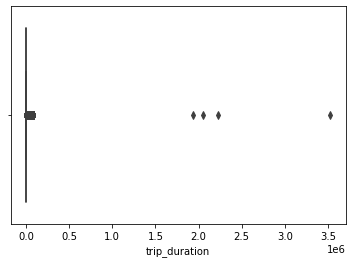

In [95]:
ax = sns.boxplot(x = df["trip_duration"])

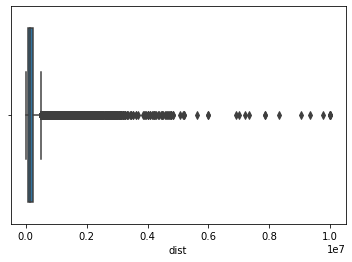

In [96]:
ax = sns.boxplot(x = df["dist"])

In [97]:
df = df.drop(df[df['trip_duration'] > 7000].index, axis=0)
df = df.drop(df[df['dist'] > 2750000].index, axis=0)

In [98]:
df1 = df.drop("trip_duration", axis = 1)
trip_duration = df["trip_duration"]

In [99]:
CatBoost = CatBoostRegressor(cat_features = columns) #depth = 11

In [100]:
Cat = CatBoost.fit(df1, trip_duration)

Learning rate set to 0.135587
0:	learn: 600.2967437	total: 379ms	remaining: 6m 18s
1:	learn: 556.8717706	total: 759ms	remaining: 6m 18s
2:	learn: 521.5124440	total: 1.1s	remaining: 6m 7s
3:	learn: 493.1970319	total: 1.48s	remaining: 6m 7s
4:	learn: 470.4237710	total: 2.06s	remaining: 6m 49s
5:	learn: 452.1461076	total: 2.44s	remaining: 6m 44s
6:	learn: 437.5190224	total: 2.77s	remaining: 6m 32s
7:	learn: 425.9078940	total: 3.22s	remaining: 6m 39s
8:	learn: 416.9246074	total: 3.69s	remaining: 6m 46s
9:	learn: 409.6788901	total: 4.16s	remaining: 6m 51s
10:	learn: 404.0301381	total: 4.47s	remaining: 6m 42s
11:	learn: 399.5236571	total: 4.92s	remaining: 6m 45s
12:	learn: 395.9687552	total: 5.25s	remaining: 6m 38s
13:	learn: 393.0168008	total: 5.57s	remaining: 6m 32s
14:	learn: 390.6144915	total: 5.9s	remaining: 6m 27s
15:	learn: 388.7567455	total: 6.25s	remaining: 6m 24s
16:	learn: 386.9030713	total: 6.58s	remaining: 6m 20s
17:	learn: 385.7153804	total: 6.92s	remaining: 6m 17s
18:	learn: 3

152:	learn: 359.3989061	total: 51.7s	remaining: 4m 46s
153:	learn: 359.3538400	total: 52s	remaining: 4m 45s
154:	learn: 359.2997689	total: 52.3s	remaining: 4m 45s
155:	learn: 359.2016432	total: 52.6s	remaining: 4m 44s
156:	learn: 359.1693689	total: 52.9s	remaining: 4m 44s
157:	learn: 359.1139637	total: 53.2s	remaining: 4m 43s
158:	learn: 359.0645750	total: 53.5s	remaining: 4m 43s
159:	learn: 359.0180017	total: 53.8s	remaining: 4m 42s
160:	learn: 358.9168486	total: 54.2s	remaining: 4m 42s
161:	learn: 358.8038446	total: 54.6s	remaining: 4m 42s
162:	learn: 358.6908390	total: 54.9s	remaining: 4m 41s
163:	learn: 358.6566787	total: 55.2s	remaining: 4m 41s
164:	learn: 358.5853826	total: 55.6s	remaining: 4m 41s
165:	learn: 358.5409516	total: 55.9s	remaining: 4m 40s
166:	learn: 358.4593838	total: 56.2s	remaining: 4m 40s
167:	learn: 358.4354330	total: 56.5s	remaining: 4m 39s
168:	learn: 358.3041581	total: 56.8s	remaining: 4m 39s
169:	learn: 358.2206348	total: 57.1s	remaining: 4m 38s
170:	learn: 

301:	learn: 351.3268164	total: 1m 39s	remaining: 3m 49s
302:	learn: 351.2854064	total: 1m 39s	remaining: 3m 49s
303:	learn: 351.2440900	total: 1m 40s	remaining: 3m 49s
304:	learn: 351.2023654	total: 1m 40s	remaining: 3m 48s
305:	learn: 351.1778832	total: 1m 40s	remaining: 3m 48s
306:	learn: 351.1200848	total: 1m 41s	remaining: 3m 48s
307:	learn: 351.0756685	total: 1m 41s	remaining: 3m 47s
308:	learn: 351.0099871	total: 1m 41s	remaining: 3m 47s
309:	learn: 350.9514147	total: 1m 42s	remaining: 3m 47s
310:	learn: 350.9170946	total: 1m 42s	remaining: 3m 46s
311:	learn: 350.8763409	total: 1m 42s	remaining: 3m 46s
312:	learn: 350.8494115	total: 1m 43s	remaining: 3m 46s
313:	learn: 350.8282359	total: 1m 43s	remaining: 3m 45s
314:	learn: 350.7732866	total: 1m 43s	remaining: 3m 45s
315:	learn: 350.7425417	total: 1m 43s	remaining: 3m 45s
316:	learn: 350.7101566	total: 1m 44s	remaining: 3m 44s
317:	learn: 350.6618300	total: 1m 44s	remaining: 3m 44s
318:	learn: 350.6106965	total: 1m 45s	remaining:

449:	learn: 346.6970129	total: 2m 26s	remaining: 2m 59s
450:	learn: 346.6647646	total: 2m 27s	remaining: 2m 59s
451:	learn: 346.6460803	total: 2m 27s	remaining: 2m 58s
452:	learn: 346.6106296	total: 2m 27s	remaining: 2m 58s
453:	learn: 346.5791877	total: 2m 28s	remaining: 2m 58s
454:	learn: 346.5581176	total: 2m 28s	remaining: 2m 57s
455:	learn: 346.5336230	total: 2m 28s	remaining: 2m 57s
456:	learn: 346.5082046	total: 2m 29s	remaining: 2m 57s
457:	learn: 346.4702303	total: 2m 29s	remaining: 2m 56s
458:	learn: 346.4458629	total: 2m 29s	remaining: 2m 56s
459:	learn: 346.4152362	total: 2m 30s	remaining: 2m 56s
460:	learn: 346.3813426	total: 2m 30s	remaining: 2m 55s
461:	learn: 346.3550448	total: 2m 30s	remaining: 2m 55s
462:	learn: 346.3439365	total: 2m 30s	remaining: 2m 55s
463:	learn: 346.3026711	total: 2m 31s	remaining: 2m 54s
464:	learn: 346.2922313	total: 2m 31s	remaining: 2m 54s
465:	learn: 346.2826968	total: 2m 31s	remaining: 2m 54s
466:	learn: 346.2594565	total: 2m 32s	remaining:

596:	learn: 343.4626348	total: 3m 14s	remaining: 2m 11s
597:	learn: 343.4541395	total: 3m 15s	remaining: 2m 11s
598:	learn: 343.4335536	total: 3m 15s	remaining: 2m 10s
599:	learn: 343.4189561	total: 3m 15s	remaining: 2m 10s
600:	learn: 343.4079683	total: 3m 16s	remaining: 2m 10s
601:	learn: 343.3850533	total: 3m 16s	remaining: 2m 9s
602:	learn: 343.3677227	total: 3m 16s	remaining: 2m 9s
603:	learn: 343.3360797	total: 3m 17s	remaining: 2m 9s
604:	learn: 343.3163939	total: 3m 17s	remaining: 2m 8s
605:	learn: 343.2944962	total: 3m 17s	remaining: 2m 8s
606:	learn: 343.2696847	total: 3m 18s	remaining: 2m 8s
607:	learn: 343.2449312	total: 3m 18s	remaining: 2m 8s
608:	learn: 343.2322956	total: 3m 18s	remaining: 2m 7s
609:	learn: 343.2252070	total: 3m 19s	remaining: 2m 7s
610:	learn: 343.2027628	total: 3m 19s	remaining: 2m 7s
611:	learn: 343.1786441	total: 3m 19s	remaining: 2m 6s
612:	learn: 343.1606034	total: 3m 20s	remaining: 2m 6s
613:	learn: 343.1377273	total: 3m 20s	remaining: 2m 6s
614:	

744:	learn: 341.0384728	total: 4m 3s	remaining: 1m 23s
745:	learn: 341.0201676	total: 4m 4s	remaining: 1m 23s
746:	learn: 341.0138450	total: 4m 4s	remaining: 1m 22s
747:	learn: 341.0079544	total: 4m 4s	remaining: 1m 22s
748:	learn: 340.9865858	total: 4m 5s	remaining: 1m 22s
749:	learn: 340.9776917	total: 4m 5s	remaining: 1m 21s
750:	learn: 340.9678181	total: 4m 5s	remaining: 1m 21s
751:	learn: 340.9503099	total: 4m 6s	remaining: 1m 21s
752:	learn: 340.9249228	total: 4m 6s	remaining: 1m 20s
753:	learn: 340.9098872	total: 4m 6s	remaining: 1m 20s
754:	learn: 340.8868434	total: 4m 7s	remaining: 1m 20s
755:	learn: 340.8796774	total: 4m 7s	remaining: 1m 19s
756:	learn: 340.8618091	total: 4m 7s	remaining: 1m 19s
757:	learn: 340.8486327	total: 4m 8s	remaining: 1m 19s
758:	learn: 340.8407063	total: 4m 8s	remaining: 1m 18s
759:	learn: 340.8322496	total: 4m 8s	remaining: 1m 18s
760:	learn: 340.8213352	total: 4m 8s	remaining: 1m 18s
761:	learn: 340.8039225	total: 4m 9s	remaining: 1m 17s
762:	learn

893:	learn: 338.9510597	total: 4m 54s	remaining: 34.9s
894:	learn: 338.9419503	total: 4m 54s	remaining: 34.5s
895:	learn: 338.9291338	total: 4m 54s	remaining: 34.2s
896:	learn: 338.9223645	total: 4m 55s	remaining: 33.9s
897:	learn: 338.9132363	total: 4m 55s	remaining: 33.5s
898:	learn: 338.8954074	total: 4m 55s	remaining: 33.2s
899:	learn: 338.8673310	total: 4m 56s	remaining: 32.9s
900:	learn: 338.8576809	total: 4m 56s	remaining: 32.6s
901:	learn: 338.8537438	total: 4m 56s	remaining: 32.2s
902:	learn: 338.8374728	total: 4m 56s	remaining: 31.9s
903:	learn: 338.8282257	total: 4m 57s	remaining: 31.6s
904:	learn: 338.8178969	total: 4m 57s	remaining: 31.2s
905:	learn: 338.8052646	total: 4m 57s	remaining: 30.9s
906:	learn: 338.7923218	total: 4m 58s	remaining: 30.6s
907:	learn: 338.7856393	total: 4m 58s	remaining: 30.2s
908:	learn: 338.7796615	total: 4m 58s	remaining: 29.9s
909:	learn: 338.7669697	total: 4m 59s	remaining: 29.6s
910:	learn: 338.7563424	total: 4m 59s	remaining: 29.3s
911:	learn

In [101]:
test = test.fillna(0)

In [102]:
test["dist"] = np.arccos(np.clip(np.sin(test['pickup_latitude']) * np.sin(test['dropoff_latitude'])+ np.cos(test['pickup_latitude'])
               * np.cos(test['dropoff_latitude'])
                   * np.cos(test['pickup_longitude'] - test['dropoff_longitude']), a_min = 0, a_max = 0.9999999)) * 6371000

In [103]:
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist
id,,,,,,,,,
id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1.597959e+05
id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,1.248150e+05
id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,1.031540e+05
id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,1.134344e+05
id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,1.438049e+06


In [104]:
proba = CatBoost.predict(test)[:]
submission = pd.read_csv("sample_submission.csv")
submission['trip_duration'] = proba
submission.to_csv("submission", index = False)